In [ ]:
### 책에서는 이 ipynb 파일의 코드 블록 하나만 예시하고 있습니다.
### 이 노트북 파일의 후반부의 학습 코드 실행시 무료 코랩은 램 부족으로 중간에 실행이 중단됩니다.
### 그 이전까지는 기존 코랩의 메뉴의 런타임 > 런타임 유형 변경 > T4 GPU를 선택으로도 코드가 실행됩니다.
### 만약 이 노트북 파일 후반부의 학습 코드까지 실행하려면 유료 코랩(Colab PRO)을 구독하고 A100 GPU 선택을 권고드립니다.

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 다음 코드를 실행하기 전에
# 구글 드라이브 Colab Notebooks 폴더 하위에 transformer_learn 폴더를 생성하고
# 다시 그 하위에 Kaggle 폴더를 생성해야 합니다.
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle
! kaggle datasets download -d validmodel/indo-fashion-dataset


/content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle
Dataset URL: https://www.kaggle.com/datasets/validmodel/indo-fashion-dataset
License(s): other
100% 2.69G/2.69G [02:19<00:00, 22.3MB/s]
100% 2.69G/2.69G [02:19<00:00, 20.7MB/s]


In [ ]:
# 런타임 20분 이상 소요
%cd /content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle
!unzip indo-fashion-dataset.zip
!rm indo-fashion-dataset.zip


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: images/val/3250.jpeg    
  inflating: images/val/3251.jpeg    
  inflating: images/val/3252.jpeg    
  inflating: images/val/3253.jpeg    
  inflating: images/val/3254.jpeg    
  inflating: images/val/3255.jpeg    
  inflating: images/val/3256.jpeg    
  inflating: images/val/3257.jpeg    
  inflating: images/val/3258.jpeg    
  inflating: images/val/3259.jpeg    
  inflating: images/val/326.jpeg     
  inflating: images/val/3260.jpeg    
  inflating: images/val/3261.jpeg    
  inflating: images/val/3262.jpeg    
  inflating: images/val/3263.jpeg    
  inflating: images/val/3264.jpeg    
  inflating: images/val/3265.jpeg    
  inflating: images/val/3266.jpeg    
  inflating: images/val/3267.jpeg    
  inflating: images/val/3268.jpeg    
  inflating: images/val/3269.jpeg    
  inflating: images/val/327.jpeg     
  inflating: images/val/3270.jpeg    
  inflating: images/val/3271.jpeg    
  inflating: images/val/3272.jpeg    
  inflating: i

In [ ]:
# 런타입 A100 GPU 기준 50분 소요
from PIL import Image
import os

# JPEG 파일을 포함하는 디렉토리 설정
jpeg_directory = '/content/drive/MyDrive/Colab Notebooks/transformer_learn/Kaggle/images/train'

# 디렉토리내 모든 파일에 걸쳐서 루프 실행
for filename in os.listdir(jpeg_directory):
    # 파일이 JPEG 확장자를 갖고 있는지 체크
    if filename.lower().endswith('.jpg') or filename.lower().endswith('.jpeg'):
        # JPEG 파일 디렉토리 full 경로 설정
        jpeg_file_path = os.path.join(jpeg_directory, filename)

        # JPEG 파일 열기
        with Image.open(jpeg_file_path) as image:
            # full 경로를 PNG 파일로 설정
            png_file_path = os.path.join(jpeg_directory, filename.rsplit('.', 1)[0] + '.png')

            # PNG 포맷으로 이미지 저장
            image.save(png_file_path, 'PNG')

        # 원래 오리지널 JPEG 파일 제거
        os.remove(jpeg_file_path)


In [ ]:
!pip install datasets
!pip install diffusers
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Declare TrainingArguments
1. `dataclass`: dataclass is a decorator introduced in Python 3.7 that simplifies the process of creating classes used mainly for storing data.
2. mixed_precision:
  *  Speed up training and reduce memory requirements without significantly affecting model accuracy.
  * The forward and backward passes of the model are typically performed using lower-precision data types
  * The weights are updated using a single-precision data type to maintain the model's accuracy

In [ ]:
# 다음 코드를 실행하기 전에
# 구글 드라이브 Colab Notebooks 폴더 하위에 transformer_learn 폴더를 생성하고
# 다시 그 하위에 chapter8과 image_gen1 폴더를 계층적으로 순차 생성해야 합니다.

from dataclasses import dataclass

@dataclass
class TrainingConfiguration:
    image_size = 128  # 생성된 이미지의 해상도
    train_batch_size = 4
    eval_batch_size = 32  # evaluation 과정 중에 샘플링 이미지 수
    num_epochs = 100
    gradient_accumulation_steps = 2
    learning_rate = 2e-4
    lr_warmup_steps = 100
    save_image_epochs = 4
    save_model_epochs = 4
    mixed_precision = 'fp16'
    output_dir = '/content/drive/MyDrive/Colab Notebooks/transformer_learn/chapter8/image_gen1'  # 로컬 및 HF Hub 상의 모델명

    overwrite_output_dir = True  # (코랩) 노트북 재실행 시 이전 모델 덮어쓰기(overwriting)
    seed = 100

config = TrainingConfiguration()


In [ ]:
import torch
if not torch.cuda.is_available():
    config.mixed_precision = False

In [ ]:
config.mixed_precision

'fp16'

# Load the Dataset
1. It is dog image datasets with 1104 samples

In [ ]:
from datasets import load_dataset
dataset = load_dataset("BirdL/DALL-E-Dogs", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/562 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

(…)-00000-of-00001-e853d788cfc98f3d.parquet:   0%|          | 0.00/98.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1104 [00:00<?, ? examples/s]

In [ ]:
print(dataset)
print(dataset[0])

Dataset({
    features: ['Images'],
    num_rows: 1104
})
{'Images': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7A276F5580D0>}


## Let's plot few images

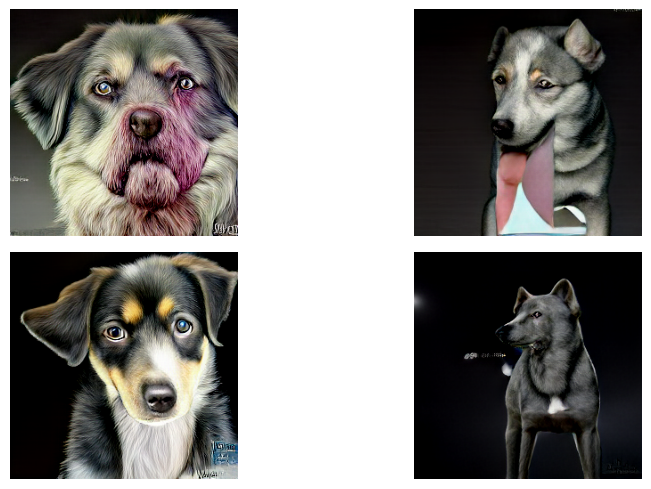

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_images(images, titles=None, cols=2, figsize=(10, 5)):
    rows = len(images) // cols + int(len(images) % cols > 0)
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    axs = axs.flatten()

    for idx, img in enumerate(images):
        axs[idx].imshow(img)
        axs[idx].axis("off")
        if titles:
            axs[idx].set_title(titles[idx])

    plt.tight_layout()
    plt.show()

# 데이터셋에서 4개의 랜덤 이미지 선택
four_images = [dataset[i]["Images"] for i in range(4)]

plot_images(four_images)


# Declare Transformation
1. dataset class provides image mechanism of applying transformation by just calling set_transform

In [ ]:
from torchvision import transforms

preprocess = transforms.Compose(
    [
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),  # 최대 15도 한도로 랜덤 회전
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["Images"]]
    return {"image": images}

dataset.set_transform(transform)

## Let's Plot the image after the transformation is applied.
1. Now, the image is in the form of tensor with (C,W,H). imshow requires images in the form of (W,H,C). Thus, we are doing permute(1,2,0)

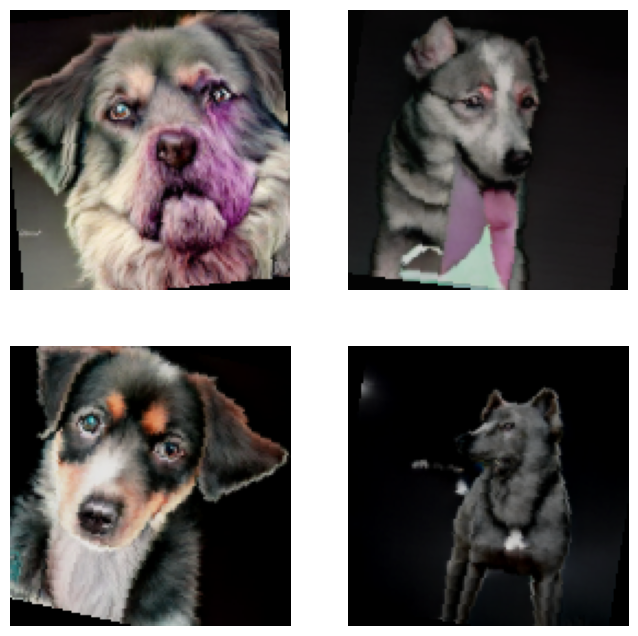

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i in range(2):
    for j in range(2):
        index = i * 2 + j
        image = dataset[index]['image'].permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize the image
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

plt.show()

# Let's Declare train_loader

In [ ]:
import torch

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=config.train_batch_size, shuffle=True)

# Let's Declare Unet2Model from the Diffusers.
Let's discuss the model parameters:


* sample_size: The size of the input images.
* in_channels: The number of input channels (e.g., 3 for RGB images).
* out_channels: The number of output channels (e.g., the number of classes for segmentation tasks).
* layers_per_block: The number of layers (convolutions) within each block of the U-Net architecture.
* block_out_channels: A tuple specifying the number of output channels for each block in the architecture.
* down_block_types: A tuple specifying the types of downsampling blocks to use in the encoding path.    
  1. "DownBlock2D": DownBlock2D is a custom implementation of a downsampling block used in the U-Net architecture. It has, CNN, Batch Normalization, and Pooling.
  2. "AttnDownBlock2D,"
up_block_types: A tuple specifying the types of upsampling blocks to use in the decoding path.
  1. "UpBlock2D"
  2. "AttnUpBlock2D"



In [ ]:
from diffusers import UNet2DModel

model = UNet2DModel(
    sample_size=config.image_size,
    in_channels=3,
    out_channels=3,
    layers_per_block=3,
    block_out_channels=(64, 128, 256, 512, 1024),
    down_block_types=(
        "DownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D",
        "UpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
from diffusers import DDPMScheduler
'''
The num_train_timesteps=1000 argument specifies the total number of timesteps that will be used during the training process.
 In other words, the noise injection process will be divided into 1000 steps,
 and each step will introduce a certain amount of noise according to the model's noise schedule.
 What does this means is
  - noise will be added to the original images over 1000 steps
  - after 1000 steps, the clean image will turned into complete noise
'''
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

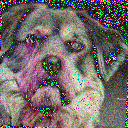

In [ ]:
sample_image = dataset[0]['image'].unsqueeze(0)
import torch
from PIL import Image

noise_tensor = torch.randn(sample_image.shape)
num_timesteps = torch.LongTensor([50])
perturbed_image = noise_scheduler.add_noise(sample_image, noise_tensor, num_timesteps)

restored_image = ((perturbed_image.permute(0, 2, 3, 1) + 1.0) * 140).type(torch.uint8).numpy()[0]
output_image = Image.fromarray(restored_image)
output_image

In [ ]:
import torch.nn.functional as F
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)

In [ ]:
from diffusers.optimization import get_cosine_schedule_with_warmup

lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=config.lr_warmup_steps,
    num_training_steps=(len(train_dataloader) * config.num_epochs),
)

In [ ]:
from diffusers import DDPMPipeline
import math

def create_image_grid(images, num_rows, num_cols):
    width, height = images[0].size
    grid = Image.new('RGB', size=(num_cols * width, num_rows * height))
    for idx, img in enumerate(images):
        grid.paste(img, box=(idx % num_cols * width, idx // num_cols * height))
    return grid

def perform_evaluation(updated_config, current_epoch, diffusion_pipeline):
    # 랜덤 노이즈로부터 이미지 생성(백워드 디퓨전 프로세스)
    # 디폴트 파이프라인 output type은 List[PIL.Image]임
    generated_images = diffusion_pipeline(
        batch_size=updated_config.eval_batch_size,
        generator=torch.manual_seed(updated_config.seed),
    ).images

    # 생성된 이미지로부터 그리드 생성
    img_grid = create_image_grid(generated_images, num_rows=4, num_cols=4)

    # 이미지 저장
    test_output_dir = os.path.join(updated_config.output_dir, "samples")
    os.makedirs(test_output_dir, exist_ok=True)
    img_grid.save(f"{test_output_dir}/{current_epoch:04d}.png")


In [ ]:
"""
### 역자 추가 코드
!pip install tensorboard
"""

In [ ]:
### 역자 주: Accelerate 라이브러리에서 logging_dir 인자는 버전 0.18.0부터 더 이상 지원되지 않으며, 대신 project_dir를 사용해야 합니다.
###        따라서 원서 코드에서 사용된 Accelerator()의 인자 logging_dir을 여기서는 project_dir로 교체했습니다. (12번째 코드 줄에 위치)

import torch
import torch.nn.functional as F
from accelerate import Accelerator
from tqdm.auto import tqdm
import os

def train(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler):
    # accelerate 초기화 및 tensorboard 로깅(logging)
    accelerator = Accelerator(
        mixed_precision='no',
        gradient_accumulation_steps=config.gradient_accumulation_steps,
        log_with="tensorboard",
        project_dir=os.path.join(config.output_dir, "logs")
    )

    if config.output_dir is not None:
        os.makedirs(config.output_dir, exist_ok=True)
        accelerator.init_trackers("train_example")

    # 필요 사항 준비
    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, train_dataloader, lr_scheduler
    )

    overall_step = 0

    # 모델 학습
    for epoch in range(config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader), disable=not accelerator.is_local_main_process)
        progress_bar.set_description(f"Epoch {epoch}")

        for step, batch in enumerate(train_dataloader):
            # 깨끗한 이미지 불러오기(retrieve)
            clean_images = batch['image']
            # 깨끗한 이미지와 동일한 형태(shape)로 랜덤 노이즈 생성
            noise = torch.randn(clean_images.shape).to(clean_images.device)
            # 배치 사이즈
            bs = clean_images.shape[0]

            '''This generates a tensor of random integers. The integers are drawn from a discrete
            uniform distribution in the range [0, noise_scheduler.num_train_timesteps).
            The shape of the tensor is (bs,), where bs is the batch size, meaning one timestep is generated for each image in the batch.
            These timesteps represent the stages at which noise is added during the forward diffusion process.
             For each image in the batch, a different timestep is randomly chosen,
              which means different amounts of noise will be added to each image.
            '''
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=clean_images.device).long()
            '''
            clean_images: These are the original, noise-free images that you want to corrupt with noise.
            noise:  This is a tensor of noise that you want to add to the clean images. It's typically randomly generated and has the same shape as clean_images.
            timesteps: These are the stages at which you want to add the noise.
             Each timestep corresponds to a different amount of noise according to the noise schedule. We have generated the timestamp of shape (bs,) in above line
            '''
            noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)
            '''
            config.gradient_accumulation_steps = 2
            `accelerator.accumulate(model)`  is designed to handle gradient accumulation during model training.
            The gradient are computed for each forward and backward pass but the model weight are updated based on the gradient_accumulation_steps
            This technique enable to have effective batch size larger then the batch_size chosed in trainloader
            '''
            with accelerator.accumulate(model):
                noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
                loss = F.mse_loss(noise_pred, noise)
                accelerator.backward(loss)

                accelerator.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()

            progress_bar.update(1)
            logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0], "step": overall_step}
            progress_bar.set_postfix(**logs)
            accelerator.log(logs, step=overall_step)
            overall_step += 1

        '''
        `if accelerator.is_main_process:` on the distributed training only the main process execute the following code.
        This avoid redunant computation and conflict
        '''
        if accelerator.is_main_process:
          # DDPMPipeline 오브젝트(object) 초기화
          # 이 파이프라인으로 evaluaton 실행, 해당 step에서 생성된 이미지 저장하고 파이프라인 자체도 저장
          pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

          if (epoch + 1) % config.save_image_epochs == 0 or (epoch + 1) % config.save_model_epochs == 0 or epoch == config.num_epochs - 1:
              perform_evaluation(config, epoch, pipeline)
              pipeline.save_pretrained(config.output_dir)

In [ ]:
# 무료 코랩에서는 실행 시간 제약으로 중간에 코랩이 멈춥니다.
# 이하는 유료 코랩에서 A100 GPU 기반으로 실행한 결과입니다.
train(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)

  0%|          | 0/276 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Further Training

In [ ]:
### 역자 주: 이하 코드는 원서 저자가 diffusion_pytorch_model.bin을 제공하지 않아서
###        실행되지 않습니다.

# 이 코드 실행 전에 구글 드라이브 Colab Notebooks 하위에 순차적으로
# chapter8 > image_gen > unet 폴더를 생성해야 합니다.
#model_path = "/content/drive/MyDrive/Colab Notebooks/transformer_learn/chapter8/image_gen/unet/diffusion_pytorch_model.bin"
#model.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [ ]:
### 역자 주: 이하 코드는 원서 저자가 diffusion_pytorch_model.bin을 제공하지 않아서
###         실행되지 않습니다.


#train(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:258: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(


  0%|          | 0/276 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:135: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

# Let's Use the model for Inference
1. Our Model is Diffusion pipeline. Thus, you need to point to the location in  your drive where you have the pipeline shaped. The directory show have
  * model_index.json
  * unet
  * scheduler

2. The following code shows how to create one image or multiple images.
3. DDPMP pipeline is slow but produce high quality images. Here, we are using DDIMPipeline which is faster

In [ ]:
### 역자 주: 코랩 유료 버전에서도 저장 공간 부족으로 이하 코드 실행이 중간에 멈춥니다.
###        다음 코드들의 결과는 원 저자가 제공한 결과입니다.

from diffusers import DDPMPipeline, DDIMPipeline, PNDMPipeline

model_id = "/content/drive/MyDrive/Colab Notebooks/transformer_learn/chapter8/image_gen1/"

# 모델 및 스케줄러(scheduler) 불러오기
ddim = DDIMPipeline.from_pretrained(model_id).to('cuda')


  0%|          | 0/50 [00:00<?, ?it/s]

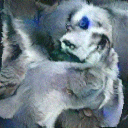

In [ ]:
from PIL import Image

# 파이프라인 추론 실행(샘플 랜덤 노이즈 및 디노이즈(denoise))
image = ddim().images[0]
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

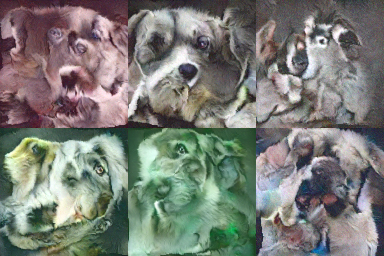

In [ ]:
from PIL import Image

# 6개 이미지 생성
generated_images = ddim(batch_size=6).images

# 그리드 생성
num_rows = 2
num_cols = 3
width, height = generated_images[0].size
grid = Image.new('RGB', size=(num_cols * width, num_rows * height))

for idx, img in enumerate(generated_images):
    grid.paste(img, box=(idx % num_cols * width, idx // num_cols * height))

# 그리드 디스플레이
grid.show()

# Analysis:
The model is not fully trained. To create high quality images we still need to go through multiple epochs of trainings